# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# OpenWeatherMap API Key
api_key = "7561ade3ac3c0aa0567cd68fd77fa751"

# Starting URS for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [20]:
# List of city data
city_data = []

In [26]:
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | neuquen
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | mzimba
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | svetlogorsk
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | xique-xique
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | norman wells
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | suntar
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | sao francisco de paula
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | sitges
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | brae
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | east london
Processing Record 23 of Set 

Processing Record 37 of Set 4 | dolores
Processing Record 38 of Set 4 | sao filipe
Processing Record 39 of Set 4 | mosetse
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | chuy
Processing Record 42 of Set 4 | harper
Processing Record 43 of Set 4 | esil
Processing Record 44 of Set 4 | seoul
Processing Record 45 of Set 4 | bethel
Processing Record 46 of Set 4 | sitka
Processing Record 47 of Set 4 | angangxi
City not found. Skipping...
Processing Record 48 of Set 4 | luyang
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 0 of Set 5 | mwinilunga
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | pudozh
Processing Record 3 of Set 5 | cabo san lucas
Processing Record 4 of Set 5 | hay river
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | nyagan
Processing Record 8 of Set 5 | port hardy
Processing Record 9 of Set 5 | hare bay
Processing Record 10 

Processing Record 28 of Set 8 | changying
Processing Record 29 of Set 8 | meridian
Processing Record 30 of Set 8 | dhidhdhoo
Processing Record 31 of Set 8 | horsham
Processing Record 32 of Set 8 | zhanaozen
Processing Record 33 of Set 8 | tadine
Processing Record 34 of Set 8 | abu dhabi
Processing Record 35 of Set 8 | kendari
Processing Record 36 of Set 8 | inuvik
Processing Record 37 of Set 8 | verkhoyansk
Processing Record 38 of Set 8 | bunia
Processing Record 39 of Set 8 | el tigre
Processing Record 40 of Set 8 | onalaska
Processing Record 41 of Set 8 | cabedelo
Processing Record 42 of Set 8 | arawa
Processing Record 43 of Set 8 | mangan
Processing Record 44 of Set 8 | skelleftea
Processing Record 45 of Set 8 | hadejia
Processing Record 46 of Set 8 | cairns
Processing Record 47 of Set 8 | chistogorskiy
Processing Record 48 of Set 8 | oussouye
Processing Record 49 of Set 8 | boguchany
Processing Record 0 of Set 9 | kushima
Processing Record 1 of Set 9 | meyungs
City not found. Skippi

Processing Record 14 of Set 12 | berlevag
Processing Record 15 of Set 12 | nyurba
Processing Record 16 of Set 12 | lukulu
Processing Record 17 of Set 12 | bubaque
Processing Record 18 of Set 12 | linjiang
Processing Record 19 of Set 12 | mildura
Processing Record 20 of Set 12 | maoming
Processing Record 21 of Set 12 | kudahuvadhoo
Processing Record 22 of Set 12 | porto velho
Processing Record 23 of Set 12 | kjopsvik
Processing Record 24 of Set 12 | seymchan
Processing Record 25 of Set 12 | andenes
Processing Record 26 of Set 12 | ati
Processing Record 27 of Set 12 | dabat
Processing Record 28 of Set 12 | geraldton
Processing Record 29 of Set 12 | hamilton
Processing Record 30 of Set 12 | monte alto
Processing Record 31 of Set 12 | mackay
Processing Record 32 of Set 12 | minas de barroteran
Processing Record 33 of Set 12 | ravar
Processing Record 34 of Set 12 | hihifo
City not found. Skipping...
Processing Record 35 of Set 12 | dromolaxia
Processing Record 36 of Set 12 | yeppoon
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [28]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,62.01,99,87,1.99,AU,1612732132
1,neuquen,-38.9516,-68.0591,71.60,43,90,8.05,AR,1612731973
2,katsuura,35.1333,140.3000,42.01,52,40,3.44,JP,1612732132
3,mzimba,-11.9000,33.6000,65.95,90,100,3.44,MW,1612732132
4,albany,42.6001,-73.9662,28.99,72,100,1.25,US,1612731974


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [29]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,20.339752,18.873395,48.742139,71.748663,50.379679,8.663209,1.612732e+09
std,33.580979,92.613263,33.679648,19.766745,39.954039,5.840058,6.834099e+01
min,-54.800000,-179.166700,-37.320000,7.000000,0.000000,0.020000,1.612732e+09
25%,-6.644700,-63.903900,25.000000,63.000000,3.000000,4.050000,1.612732e+09
50%,22.678300,24.731400,62.600000,76.000000,48.000000,7.650000,1.612732e+09
75%,49.981100,105.324700,76.150000,86.000000,90.000000,12.530000,1.612732e+09
max,78.218600,178.416700,95.790000,100.000000,100.000000,44.870000,1.612732e+09


In [30]:
#  Get the indices of cities that have humidity over 100%.
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data


Int64Index([], dtype='int64')

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,62.01,99,87,1.99,AU,1612732132
1,neuquen,-38.9516,-68.0591,71.60,43,90,8.05,AR,1612731973
2,katsuura,35.1333,140.3000,42.01,52,40,3.44,JP,1612732132
3,mzimba,-11.9000,33.6000,65.95,90,100,3.44,MW,1612732132
4,albany,42.6001,-73.9662,28.99,72,100,1.25,US,1612731974


In [33]:
# # Extract relevant fields from the data frame
# lats = clean_city_data["Lat"]
# max_temps = clean_city_data["Max Temp"]
# humidity = clean_city_data["Humidity"]
# cloudiness = clean_city_data["Cloudiness"]
# wind_speed = clean_city_data["Wind Speed"]

# # Export the City_Data into a csv
# clean_city_data.to_csv(output_data_file, index_label="City_ID")


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

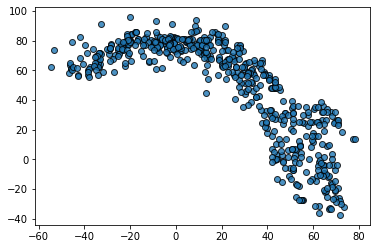

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

## Latitude vs. Humidity Plot

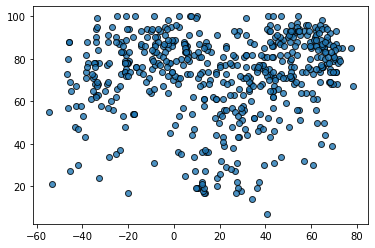

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


## Latitude vs. Cloudiness Plot

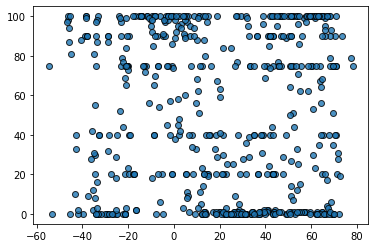

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")


## Latitude vs. Wind Speed Plot

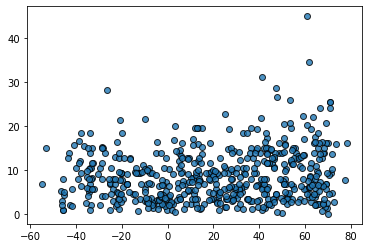

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

## Linear Regression

In [41]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
        # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [42]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7472491614006757


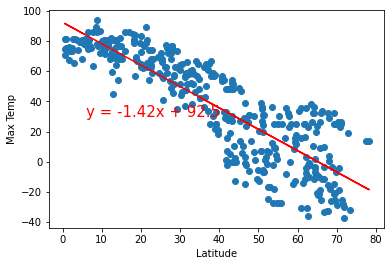

In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.33898920440761454


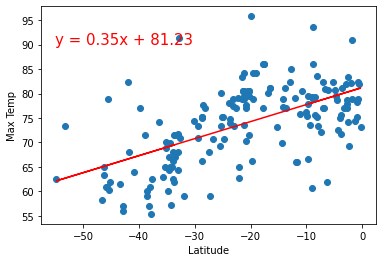

In [44]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

Strong positive correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.093374447623033


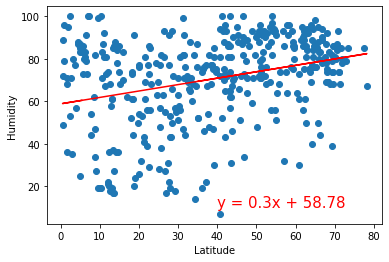

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.136399462471531


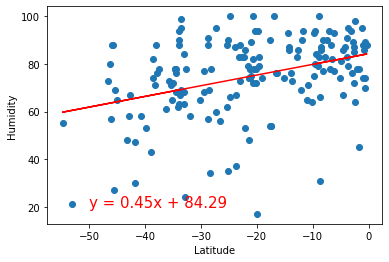

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


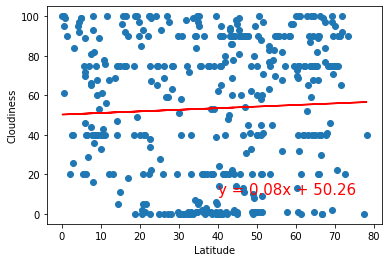

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

No real relationshop between humidity and latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06907175524372297


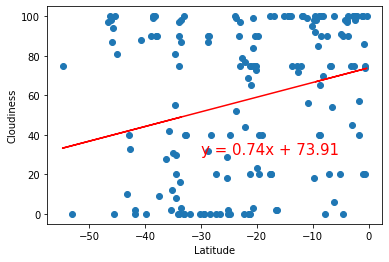

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02479012828135564


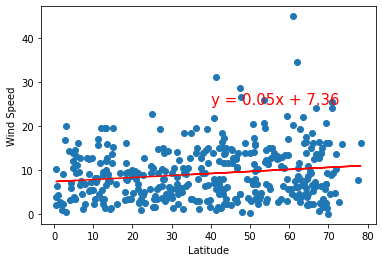

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03540510425530176


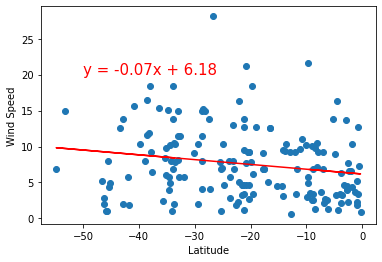

In [52]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))